In [48]:
vical <- read.table("../Data/4_overall_summary/Vical_summary.csv", sep="\t", header=T)
raw <- read.table("../Data/4_overall_summary/Raw_summary.csv",  sep="\t", header=T)
fil <- read.table("../Data/4_overall_summary/Fil_summary.csv", sep="\t", header=T)

In [49]:
library(reshape2)
melt_vical <- melt(vical, id.vars=c("X"))
melt_raw <- melt(raw, id.vars=c("X"))
melt_fil <- melt(fil, id.vars=c("X"))

In [50]:
library(dplyr)
library(tidyr)

In [51]:
melt_vical <- melt_vical %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))
melt_raw <- melt_raw %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))
melt_fil <- melt_fil %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))

In [52]:
shaped_vical <- dcast(melt_vical, X+Wavelength~Sample_Type+mean_or_sd)
shaped_raw <- dcast(melt_raw, X+Wavelength~Sample_Type+mean_or_sd)
shaped_fil <- dcast(melt_fil, X+Wavelength~Sample_Type+mean_or_sd)

In [54]:
library(ggplot2)
theme_set(theme_classic())

### Vicariously calibrated

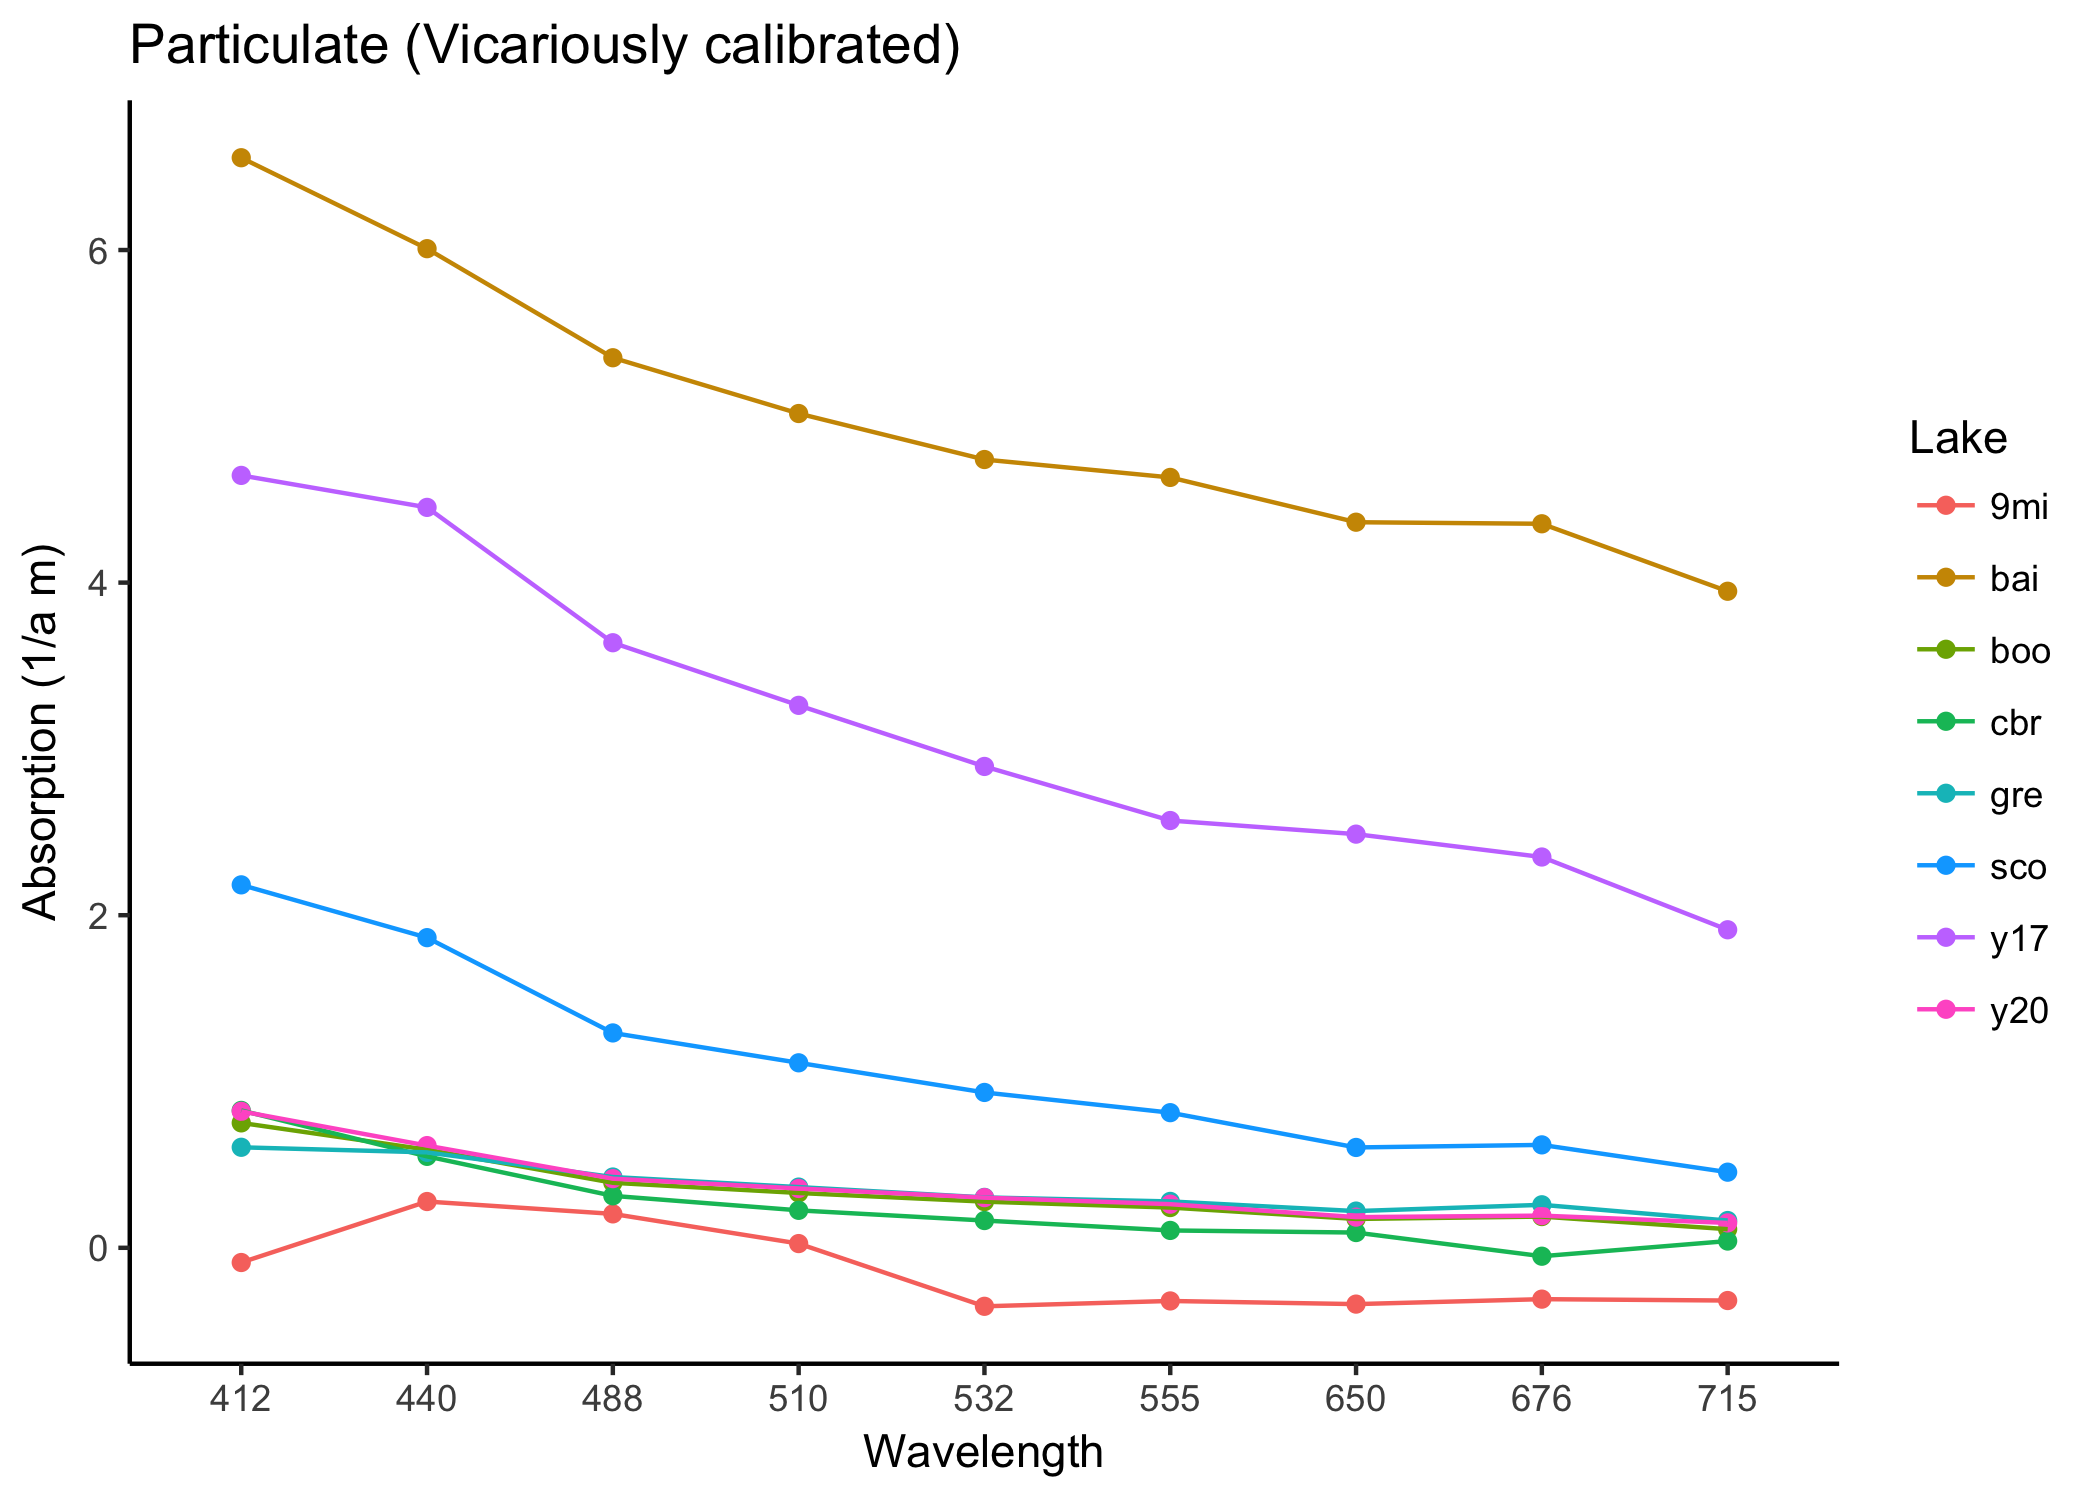

In [55]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300)
ggplot(shaped_vical, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Particulate (Vicariously calibrated)")

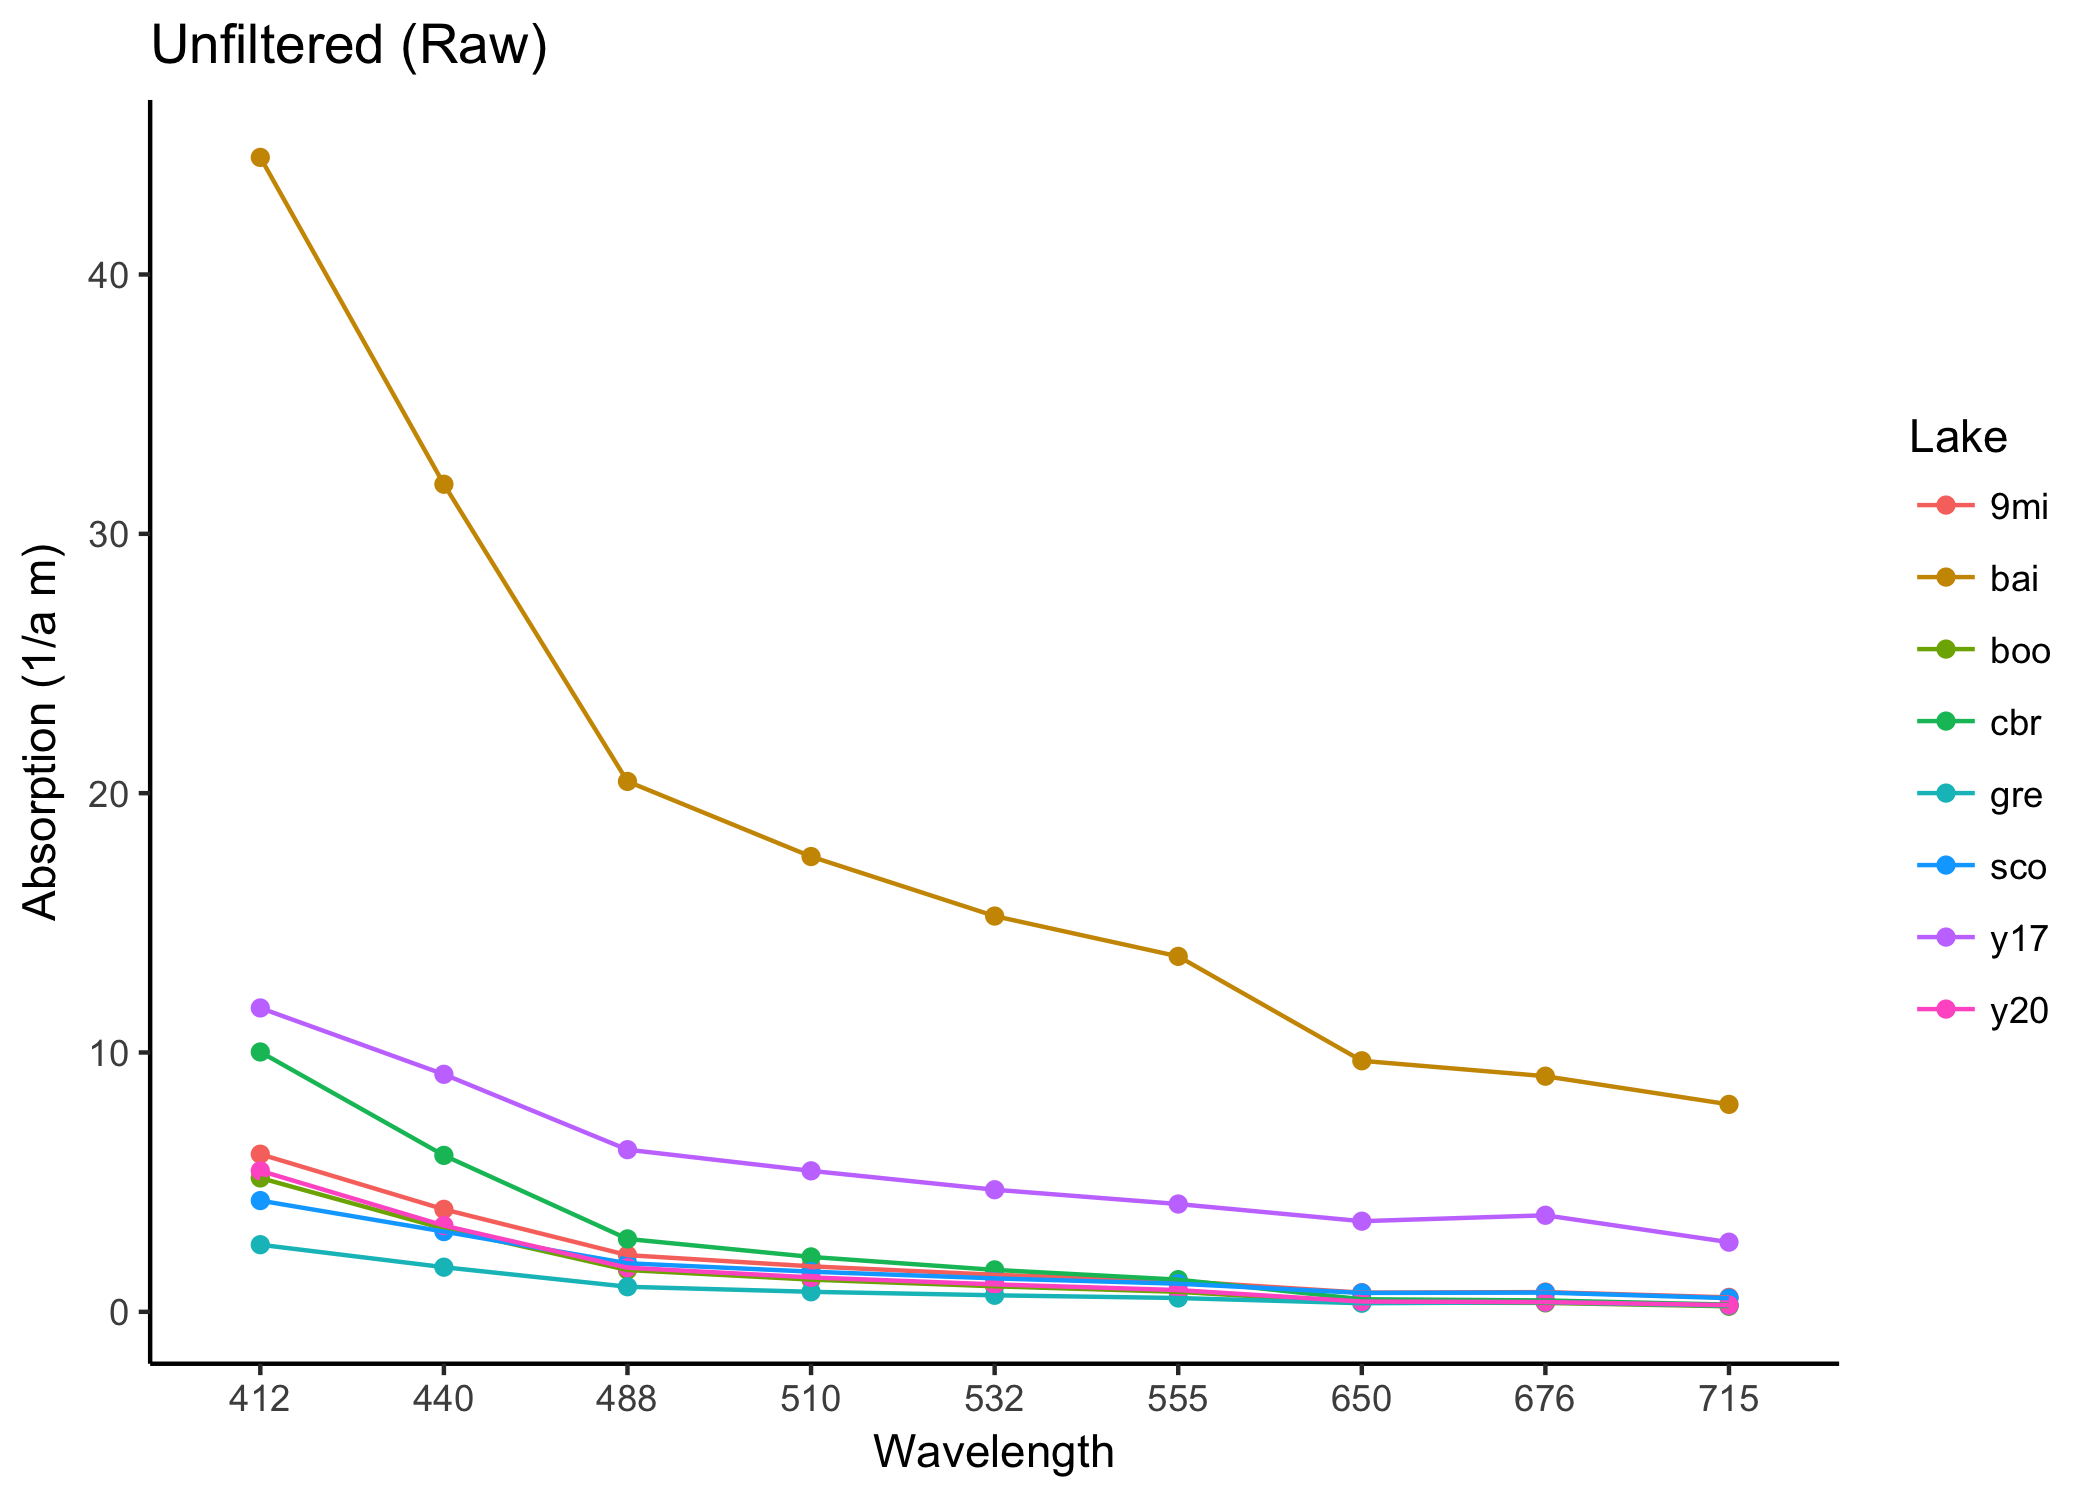

In [56]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300)
ggplot(shaped_raw, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Unfiltered (Raw)")

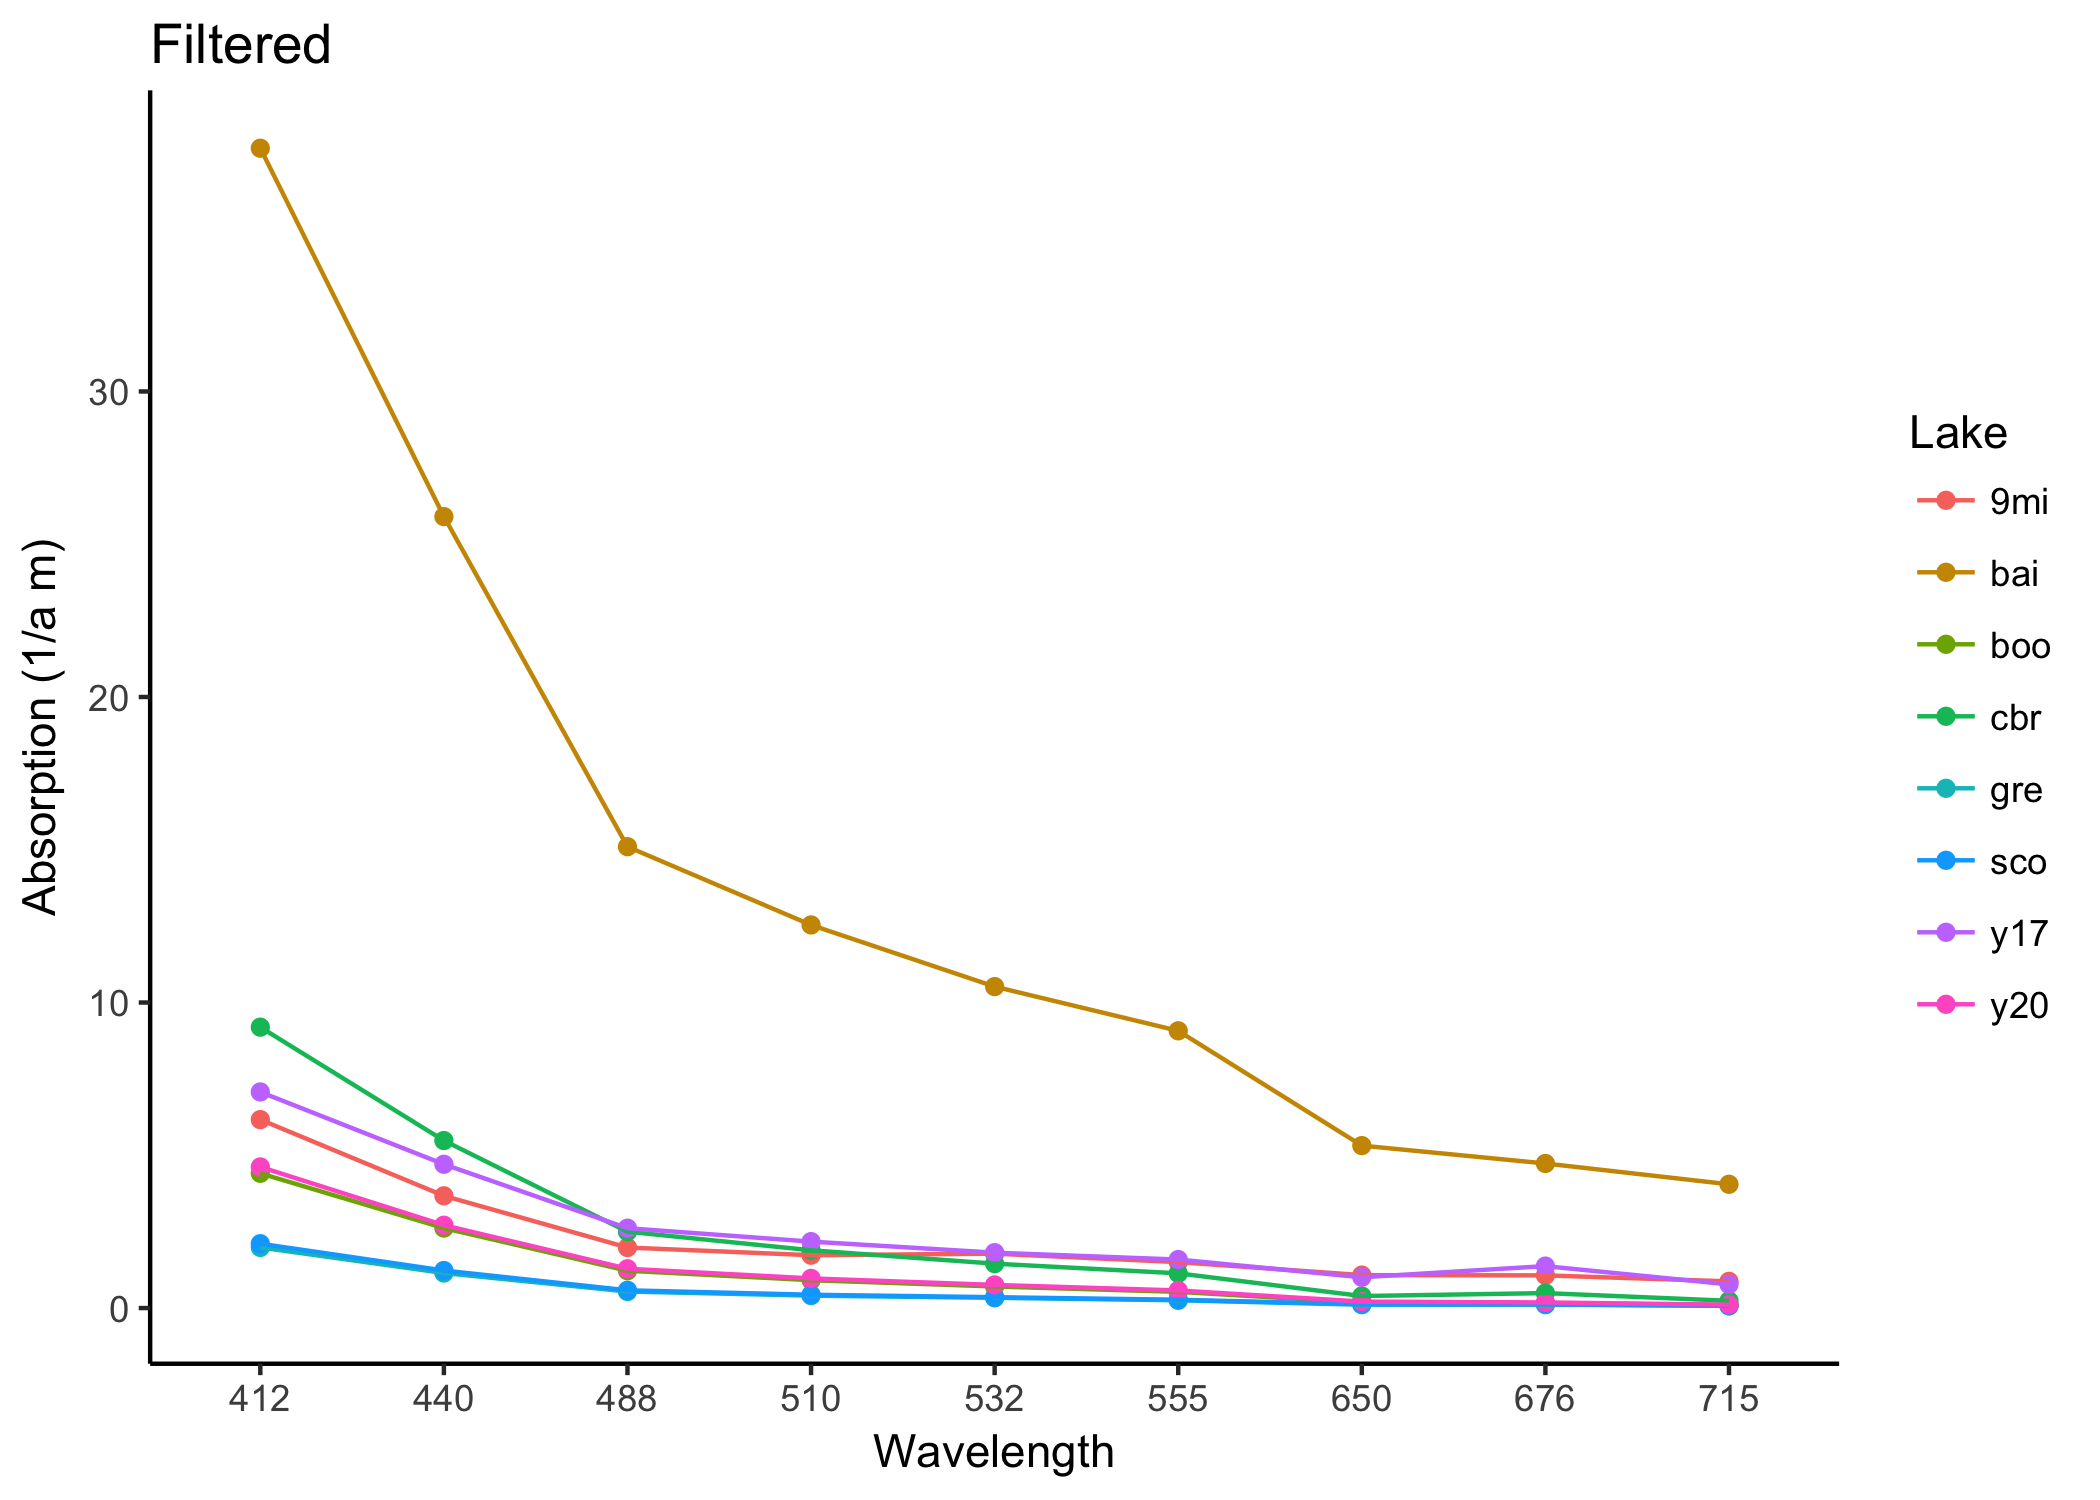

In [57]:
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300)
ggplot(shaped_fil, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Filtered")